<div style="background-color:#F0FFF0; padding:50px;">
<b style="font-size:34px;">High Blood Pressure Prediction with Machine Learning</b>
</div>      

In [305]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [306]:
#read csv file
data = pd.read_csv('/kaggle/input/smokers-health-data/smoking_health_data_final.csv')

In [307]:
data.shape

(3900, 7)

In [308]:
#print first five rows 
data.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [309]:
#print information from data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


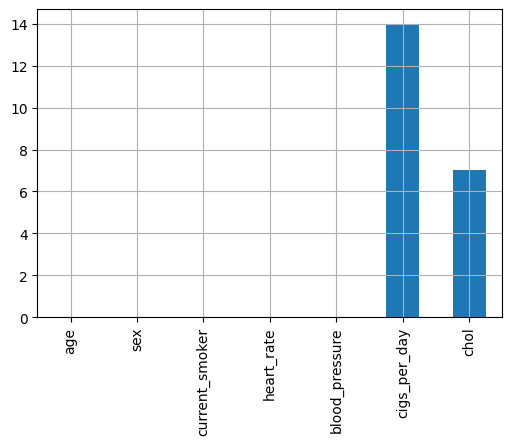

In [310]:
#graph for missing value per column
nan_value = data.isna().sum()
nan_value.plot(kind='bar', figsize=(6, 4))
plt.grid(True)
plt.show()

In [311]:
#print number of duplicates in dataset
data.duplicated().sum()

0

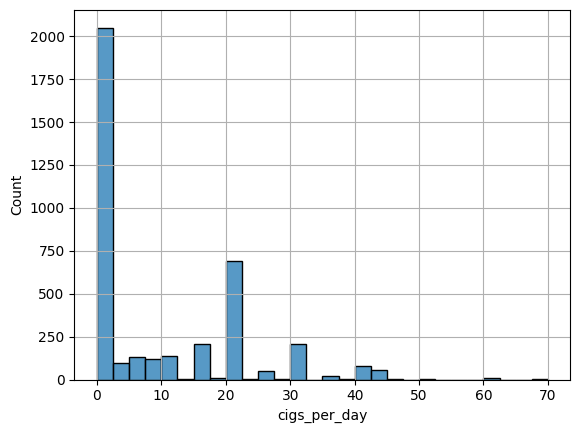

In [312]:
#column value distribution
sns.histplot(data['cigs_per_day'])
plt.grid(True)

In [313]:
#median for column 'cigs_per_day'
median_chol = data['cigs_per_day'].median()
median_chol

0.0

In [314]:
data.loc[:, 'cigs_per_day'] = data['cigs_per_day'].fillna(median_chol)

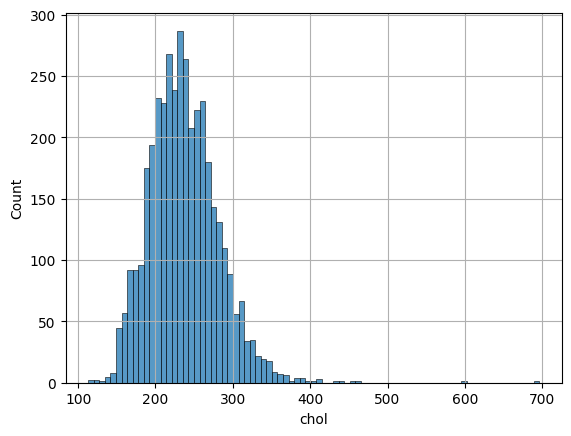

In [315]:
##column value distribution
sns.histplot(data['chol'])
plt.grid(True)

In [316]:
#find the median from column chol
median_chol = data['chol'].median()
median_chol

234.0

In [317]:
# replacing missing value with median
data.loc[:, 'chol'] = data['chol'].fillna(median_chol)

In [318]:
#chech if any missing values remain
data[['chol','cigs_per_day']].isna().sum()

chol            0
cigs_per_day    0
dtype: int64

In [319]:
#check column
data['blood_pressure'].head()

0      110/72
1      121/72
2    127.5/76
3    122.5/80
4      119/80
Name: blood_pressure, dtype: object

In [320]:
#split column blood_pressure in two columns
data[['systolic', 'diastolic']] = data['blood_pressure'].str.split('/', expand=True)

In [321]:
# remove blood_pressure column in my dataframe
data = data.drop('blood_pressure', axis=1)

In [322]:
#print again first five rows
data.head()

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,systolic,diastolic
0,54,male,yes,95,0.0,219.0,110,72
1,45,male,yes,64,0.0,248.0,121,72
2,58,male,yes,81,0.0,235.0,127.5,76
3,42,male,yes,90,0.0,225.0,122.5,80
4,42,male,yes,62,0.0,226.0,119,80


In [323]:
#check type
data['diastolic'].dtype

dtype('O')

In [324]:
#I revome space if there are and change type from object to float
data['diastolic'] = data['diastolic'].str.strip()
data['diastolic'] = data['diastolic'].astype('float')

In [325]:
#check type
data['systolic'].dtype

dtype('O')

In [326]:
#I revome space if there are and change type from object to float
data['systolic'] = data['systolic'].str.strip()
data['systolic'] = data['systolic'].astype('float')

In [327]:
#I check if the data type has been converted correctly
data['diastolic'].dtype

dtype('float64')

In [328]:
#I check if the data type has been converted correctly
data['systolic'].dtype

dtype('float64')

In [329]:
#print the unique values in column 'current smoker'
data['current_smoker'].unique()

array(['yes', 'no'], dtype=object)

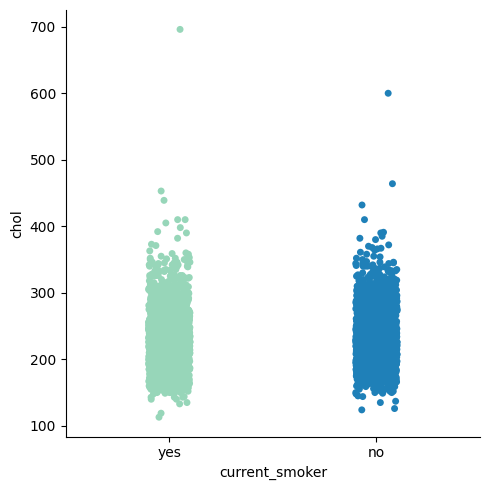

In [330]:
#I create a graph to check how much cholesterol people have when they are smokers or non-smokers.
sns.catplot(x = 'current_smoker', y = 'chol', data = data,palette='YlGnBu')
plt.show()

In [331]:
#I create the mask for smoker and non-smoker people
smoker = data[data['current_smoker'] == 'yes']
non_smoker = data[data['current_smoker'] == 'no']

In [332]:
#I check how many men and how many women smoke.
sex_smoker = smoker.groupby('sex').size()
sex_smoker

sex
female     827
male      1105
dtype: int64

In [333]:
#I check how many men and how many women dont smoke.
sex_non_smoker = non_smoker.groupby('sex').size()
sex_non_smoker

sex
female    1254
male       714
dtype: int64

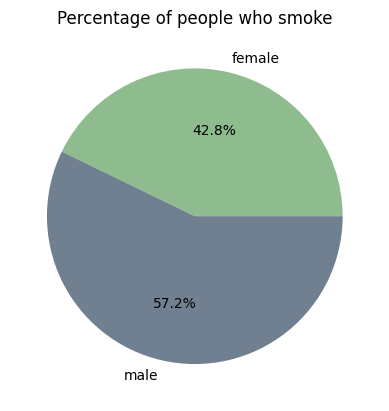

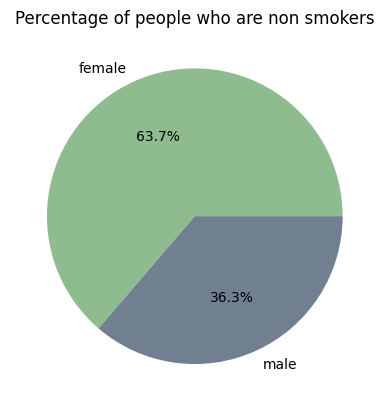

In [334]:
#I create two graphs to see what the percentage of smokers and non-smokers is among men and women.
sex_smoker.plot(kind='pie', autopct='%1.1f%%', colors=['darkseagreen', 'slategrey'])
plt.title('Percentage of people who smoke')
plt.show()
sex_non_smoker.plot(kind='pie', autopct='%1.1f%%', colors=['darkseagreen', 'slategrey'])
plt.title('Percentage of people who are non smokers')
plt.show()

In [335]:
#statistical information
data.describe()

,age,heart_rate,cigs_per_day,chol,systolic,diastolic
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.135641,236.591282,132.395385,82.987179
std,8.559275,12.015376,12.028875,44.335649,21.976335,11.918623
min,32.000000,44.000000,0.000000,113.000000,83.500000,48.000000
25%,42.000000,68.000000,0.000000,206.000000,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000


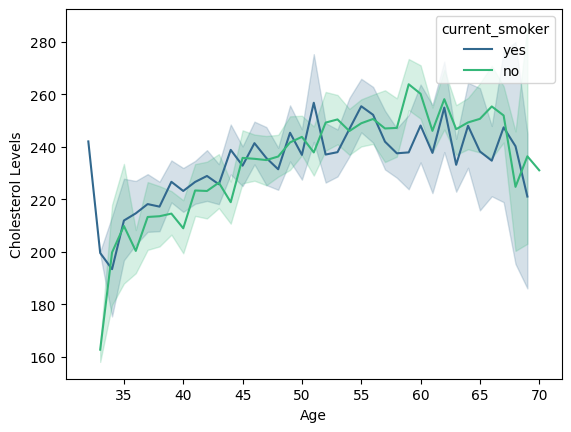

In [336]:
#Cholesterol levels by age in smokers and non-smokers
sns.lineplot(data=data, x='age', y='chol', hue= 'current_smoker', palette= 'viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()

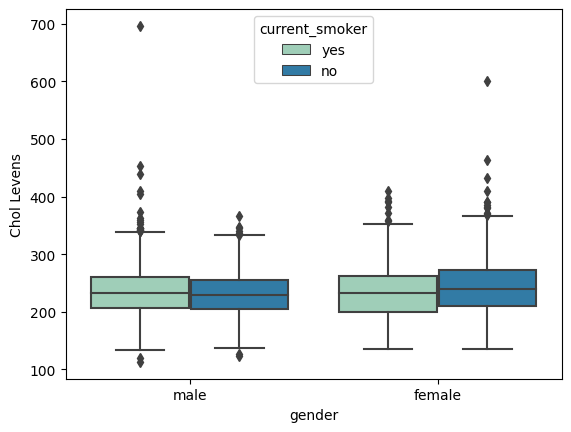

In [337]:
#Cholesterol levels in women and men, smokers and non-smokers
sns.boxplot(data=data, x='sex', y='chol',hue='current_smoker',palette='YlGnBu')
plt.xlabel('gender')
plt.ylabel('Chol Levens')
plt.show()

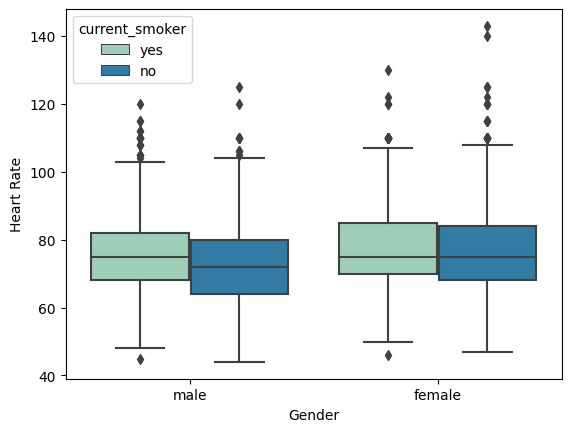

In [338]:
#Heart rate levels in women and men, smokers and non-smokers
sns.boxplot(data=data, x='sex', y='heart_rate',hue= 'current_smoker',palette='YlGnBu')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.show()

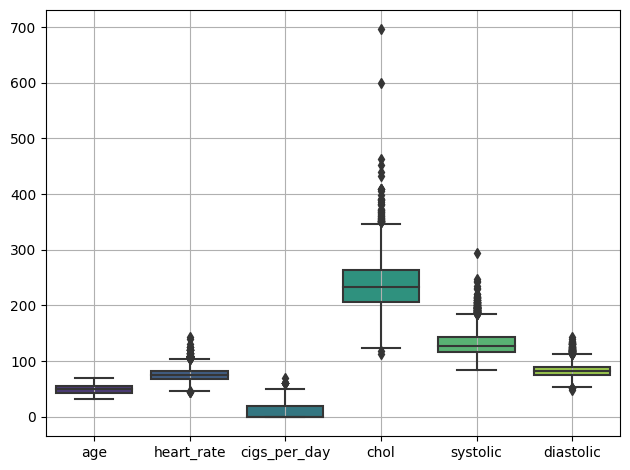

In [339]:
#check dataset outliers
sns.boxplot(data=data, palette= 'viridis')
plt.tight_layout()
plt.grid()
plt.show()

In [340]:
#check unique values for 'sex' column
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [341]:
#convert column 'sex' from str to categorical
data['sex'] = data['sex'].map({'female':0 ,'male':1})
data['sex'].unique()

array([1, 0])

In [342]:
#check unique values for colum
data['current_smoker'].unique()

array(['yes', 'no'], dtype=object)

In [343]:
##convert column 'current_smoker' from str to categorical
data['current_smoker'] = data['current_smoker'].map({'yes':1 ,'no':0})
data['current_smoker'].unique()

array([1, 0])

In [344]:
data[data['current_smoker'] == 1]

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,systolic,diastolic
0,54,1,1,95,0.0,219.0,110.0,72.0
1,45,1,1,64,0.0,248.0,121.0,72.0
2,58,1,1,81,0.0,235.0,127.5,76.0
3,42,1,1,90,0.0,225.0,122.5,80.0
4,42,1,1,62,0.0,226.0,119.0,80.0
...,...,...,...,...,...,...,...,...
3895,37,1,1,88,60.0,254.0,122.5,82.5
3896,49,1,1,70,60.0,213.0,123.0,75.0
3897,56,1,1,70,60.0,246.0,125.0,79.0
3898,50,1,1,85,60.0,340.0,134.0,95.0


In [345]:
#I create mask for I split my dataset to two dataset
data_normal = data[data['chol'] < 400]
data_outliers = data[data['chol'] >= 400]

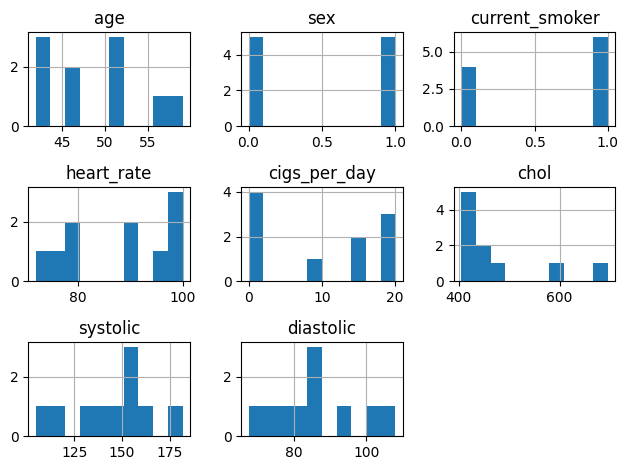

In [346]:
#I see the distribution of data by column
data_outliers.hist()
plt.tight_layout()

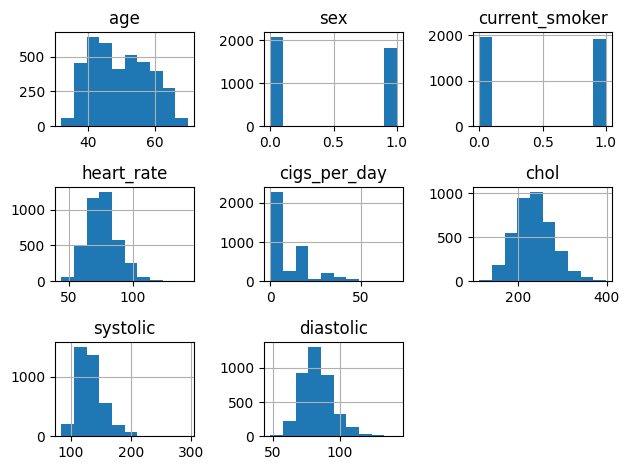

In [347]:
#I see the distribution of data by column
data_normal.hist()
plt.tight_layout()

In [348]:
#length of outliers values
len_outliers = len(data_outliers) / len(data) * 100
len_outliers

0.2564102564102564

In [349]:
#length of normal values
len_normal = len(data_normal) / len(data) * 100
len_normal

99.74358974358975

In [350]:
#I create lists for my pie graph for I see how many outliers I have in my dataset
percentages = [0.2564, 99.7436]
labels = ['outliers', 'normal']
my_colors = ['darkseagreen', 'slategrey']

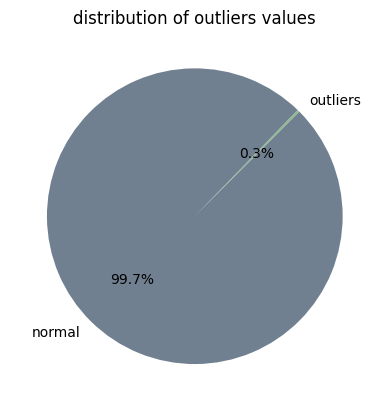

In [351]:
#My Graph pie with outliers
data_series = pd.Series(percentages, index=labels)
data_series.plot(kind='pie', autopct='%1.1f%%', colors= my_colors, startangle=45)
plt.title('distribution of outliers values') 
plt.show()


In [352]:
#I create a new column indicating high blood pressure if systolic ≥ 140 or diastolic ≥ 90
data_normal['high_bp'] = ((data_normal['systolic'] >= 140) | (data_normal['diastolic'] >= 90)).astype(int)

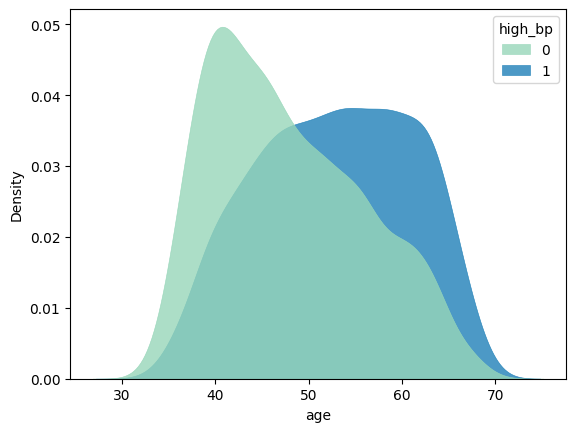

In [353]:
#distribution graph for dataset (data_normal) of age for high cholesterol and low
sns.kdeplot(
   data=data_normal, x='age', hue='high_bp',
   fill=True, common_norm=False, palette='YlGnBu',
   alpha=.8, linewidth=0.4,
)
plt.show()

In [354]:
data_normal['high_bp'].value_counts()

high_bp
0    2497
1    1393
Name: count, dtype: int64

In [355]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report ,accuracy_score

In [356]:
#define independent and dependent variables
x_ = data_normal.drop(['systolic','diastolic','high_bp'], axis=1)

y_ = data_normal['high_bp']

In [357]:
#I split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size = 0.2, random_state = 50)

In [358]:
# I normalize the data, except for the 'sex' column because it is in 1 and 0
scaler_ = StandardScaler()
X_train_sc = scaler_.fit_transform(X_train.drop(['sex',	'current_smoker'], axis=1))
X_test_sc = scaler_.transform(X_test.drop(['sex','current_smoker'], axis=1))

In [359]:
#Convert back to DataFrame with the correct column names and indexes
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.drop(['sex',	'current_smoker'], axis=1).columns, index=X_train.index)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.drop(['sex',	'current_smoker'], axis=1).columns, index=X_test.index)

In [360]:
#I reconnect the column
X_train = pd.concat([X_train_sc, X_train[['sex','current_smoker']]], axis=1)
X_test = pd.concat([X_test_sc, X_test[['sex','current_smoker']]], axis=1)

In [361]:
##I create the logistic regression model and train it
model_log = LogisticRegressionCV(
    Cs=5,
    cv=10,
    solver='liblinear',
    scoring='accuracy',
    max_iter=2000,
)
model_log.fit(X_train, y_train)

LogisticRegressionCV(Cs=5, cv=10, max_iter=2000, scoring='accuracy',
                     solver='liblinear')

In [362]:
#I predict with test
pred_y = model_log.predict(X_test)

In [363]:
'Accuracy is : {0:0.2f}'. format(accuracy_score(y_test, pred_y))

'Accuracy is : 0.70'

In [364]:
#I predict again with the train data.
pred_y_train = model_log.predict(X_train)

In [365]:
'Accuracy for the train is : {0:0.2f}'. format(accuracy_score(y_train, pred_y_train))

'Accuracy for the train is : 0.68'

In [366]:
print('Report for test data : \n',classification_report(y_test, pred_y))

Report for test data : 
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       514
           1       0.60      0.37      0.46       264

    accuracy                           0.70       778
   macro avg       0.66      0.62      0.63       778
weighted avg       0.68      0.70      0.68       778



In [367]:
#create confusion matrix for I see result
conf_matrix = confusion_matrix(y_test, pred_y)
conf_matrix

array([[448,  66],
       [166,  98]])

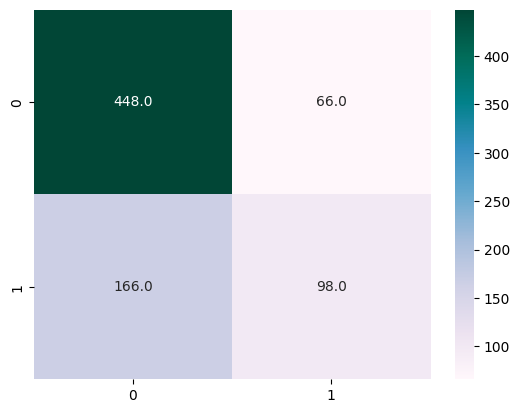

In [368]:
##Graph for confusion result
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="PuBuGn")
plt.show()

In [369]:
#How many have high blood pressure and how many don't
y_.value_counts(normalize=True)

high_bp
0    0.641902
1    0.358098
Name: proportion, dtype: float64

In [370]:
#import library
from sklearn.ensemble import RandomForestClassifier

In [371]:
#create a random forest model
model_rf = RandomForestClassifier(n_estimators=200,
    max_depth=8,        
    min_samples_split=10,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=50)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=50)

In [372]:
'Train Accuracy:', model_rf.score(X_train, y_train)

('Train Accuracy:', 0.7519280205655527)

In [373]:
'Test Accuracy:', model_rf.score(X_test, y_test)

('Test Accuracy:', 0.6863753213367609)

In [374]:
#prediction results
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       514
           1       0.53      0.65      0.59       264

    accuracy                           0.69       778
   macro avg       0.66      0.68      0.67       778
weighted avg       0.71      0.69      0.69       778



In [375]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)
conf_matrix_rf

array([[362, 152],
       [ 92, 172]])

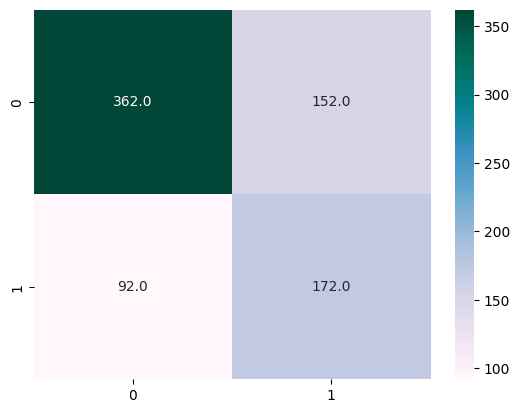

In [376]:
#confusion matrix graph
sns.heatmap(conf_matrix_rf, annot=True, fmt=".1f", cmap="PuBuGn")
plt.show()